# CS 237 Fall 2019   Homework Eight

### Due date: PDF file due Thursday November 7th @ 11:59PM in GradeScope with 6-hour grace period

### Late deadline:  If submitted up to 24 hours late, you will receive a 10% penalty (with same 6 hours grace period)

### Note: This homework has only 8 problems, and is worth 40 points (5 points each, as usual)

### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submitting. 

There are two sections to the homework: problems 1 - 6 are analytical problems about last
week's material, and the remaining problems are coding problems. 

In [1]:
# General useful imports
import numpy as np
from numpy import arange,linspace,mean, var, std
import matplotlib.pyplot as plt  
from numpy.random import random, randint, uniform, choice, binomial, geometric, poisson,seed 
from math import exp,ceil
from collections import Counter
import pandas as pd
%matplotlib inline

def C(N,K):
    if(K < N/2):
        K = N-K
    X = [1]*(K+1)
    for row in range(1,N-K+1):
        X[row] *= 2
        for col in range(row+1,K+1):
            X[col] = X[col]+X[col-1]
    return X[K]


# Numpy basic stats functions

# https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html


X = [1,2,3]

# mean of a list
mean(X)

# population variance
var(X)

# sample variance
var(X,ddof=1)

# population standard deviation
std(X)

# sample standard deviation
std(X,ddof=1)


# Scipy statistical functions

from scipy.stats import norm,expon 

# https://docs.scipy.org/doc/scipy/reference/stats.html

# given random variable X (e.g., housing prices) 
# normally distributed with  mu = 60, sigma = 40

#a. Find P(X<50)
norm.cdf(x=50,loc=60,scale=40) # 0.4012936743170763

#b. Find P(X>50)
norm.sf(x=50,loc=60,scale=40) # 0.5987063256829237

#c. Find P(60<X<80)
norm.cdf(x=80,loc=60,scale=40) - norm.cdf(x=60,loc=60,scale=40)

#d. how much top most 5% expensive house cost at least? or find x where P(X>x) = 0.05
norm.isf(q=0.05,loc=60,scale=40)

#e. how much top most 5% cheapest house cost at least? or find x where P(X<x) = 0.05
norm.ppf(q=0.05,loc=60,scale=40)

#f give the endpoints of the range for the central alpha percent of the distribution
norm.interval(alpha=0.3, loc=60, scale=140)

#g. generate random variates
norm.rvs(loc=60, scale=40, size=10)

# Exponential distribution
# The library lets you set where the distribution begins (so keep loc=0)
# and the scale (=std dev); since std dev = 1/lambda, then we need to
# invert lambda to input the scale:

lam = 2                              # example rate parameter
expon.pdf(x=3,loc=0,scale=1/lam)     # library uses scale, so must invert lambda

expon.rvs(loc=0,scale=1/lam,size=10)


# Utility functions

# Round to 4 decimal places
def round4(x):
    return round(float(x)+0.00000000001,4)


## Analytical Problems

For the following problems, use the statistical functions given at the top of this notebook. 

Also consider using the Distributions Notebook posted online to visualize these distributions (but use scipy.stats for the calculations). 

You are not required to do so, but a nice touch is to print out your answer in a code block, i.e., if
you were asked "What is the probability in the standard normal that a value occurs in the interval between
-0.94 and 1.2 standard deviations from 0," you could answer as follows:

In [2]:
mu = 0
sigma = 1
lo = -0.94
hi = 1.2

answer = norm.cdf(x=hi,loc=mu,scale=sigma) - norm.cdf(x=lo,loc=mu,scale=sigma)
print("Solution: " + str(round4(answer)))

Solution: 0.7113


## Problem One (Verifying the CLT)

In this problem you will reproduce a result I showed in class, showing how the sample mean of samples from an exponential distribution produce a normal distribution following the prediction of the CLT.  

Since we did something very similar in HW 07, I reproduce some of that code; all you have to do
is 

(a)  to generate the exponential variates (see the first code cell above!) and run the experiments
and 

(b) think about what you are seeing and answer a simple question.  

C:\Users\Rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


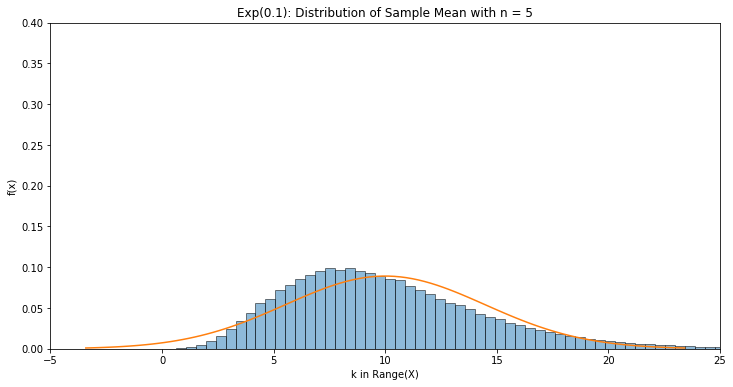

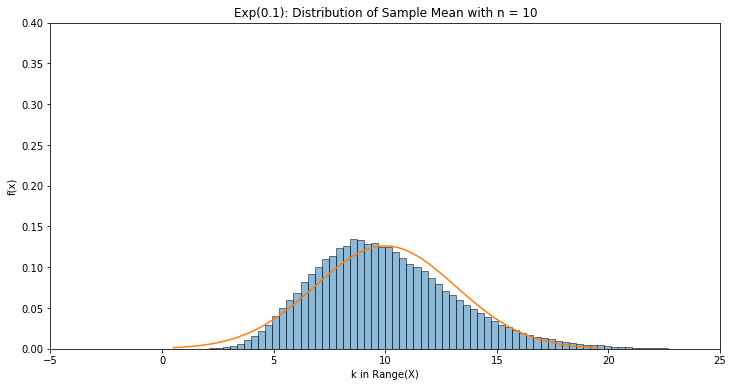

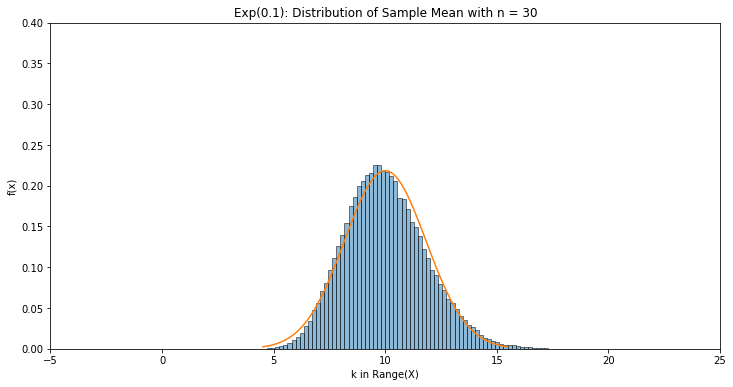

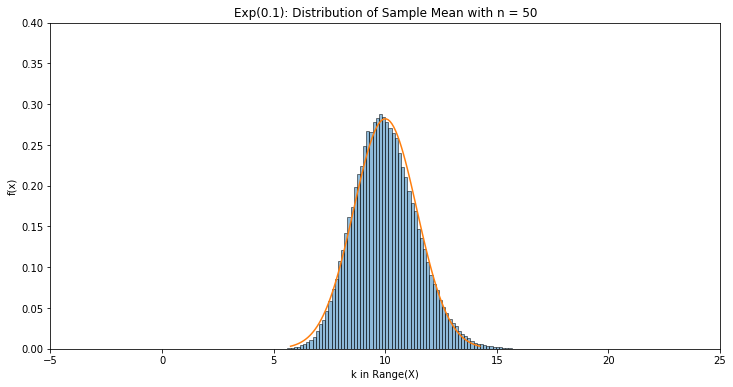

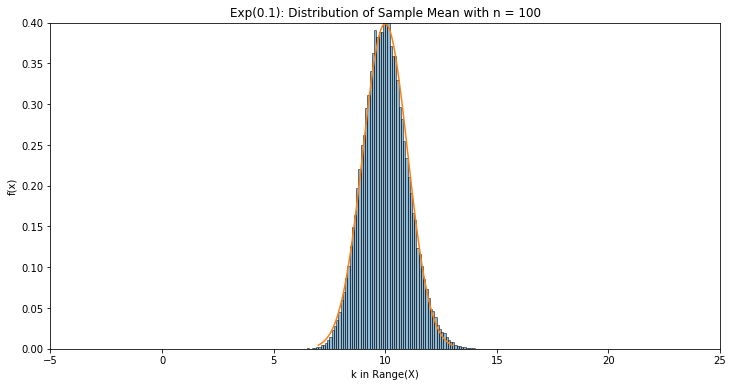

In [3]:
# Part (a) 

def sampleMeanExponential(lam,n):
    return mean(expon.rvs(loc=0,scale=1/lam,size=n))                                #  YOUR CODE HERE

# Display the result  of generating num_trials values of the sample mean using
# the above function, and graph the result, adapting the code from Problem 1 and using
# an appropriate bin_width to demonstrate the results most clearly

# Define the boundaries of bins with the specified width around the mean, 
# to plus/minus at least 4 * sigma

# bin_width is in units of sigma, so bin_width = 0.1 means sigma/10

def makeBins(mu,sigma,bin_width):
    numBins = ceil(4/bin_width)
    bins = [mu+sigma*bin_width*x for x in range(-numBins,numBins+1)]
    return bins

def display_sample_mean_exponential(lam,n,num_trials,bin_widths=0.1):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Exp('+str(lam)+'): Distribution of Sample Mean with n = ' + str(n))
    plt.ylabel("f(x)")
    plt.xlabel("k in Range(X)")
    ax.set_xlim(-5,25)
    ax.set_ylim(0,0.4)
    mu = 1/lam
    sigma = (1/lam) / (n**0.5)
    
    # use exponential to generate random samples
    X = [sampleMeanExponential(lam,n) for i in range(num_trials)]
    plt.hist(X,bins=makeBins(mu,sigma,bin_widths), normed=True,edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
    
    # Now generate the theoretical normal for sample mean with std dev sigma/sqrt(n)

    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()
    

lam = 0.1
num_trials = 10**5

# Now try for various sizes n = 5, 10, 30, 50, 100


# YOUR CODE HERE

a = 5

b = 10

c = 30

d = 50

e = 100

display_sample_mean_exponential(lam,a,num_trials,bin_widths=0.1)

display_sample_mean_exponential(lam,b,num_trials,bin_widths=0.1)

display_sample_mean_exponential(lam,c,num_trials,bin_widths=0.1)

display_sample_mean_exponential(lam,d,num_trials,bin_widths=0.1)

display_sample_mean_exponential(lam,e,num_trials,bin_widths=0.1)


**Part (b)**

Answer in a short sentence:  At what value does it seem the sample means are normally distributed? 
Is 30 a reasonable number to suggest for when this becomes "normally distributed"?

At n = 30. 30 is a reasonable number to suggest for when this becomes normally distributed.

## Problem Two (CLT) 

Consider a population $R_X$ consisting of the five numbers $\{ 2, 3, 6, 8, 11 \}$, where the random variable $X$ selects a number equiprobably from this population and returns it.

(a) Find the mean and the (population) standard deviation of this population. (Hint: Use the functions shown in the first code cell.)

Now consider all 25 possible samples of size 2 that can be selected with replacements from this population, i.e.,
<pre>
(2, 2)       (2, 3)   ....    (2, 11)
(3, 2)       (3, 2)   ....    (3, 11)

     ....
     
(11, 2)      (11, 3)  ....     (11, 11)
</pre>

Let us denote by <code>XBar2</code> the random variable that selects one of these pairs (i.e., a random sample of size 2) and returns the mean of these two numbers; <code>XBar2</code> has a distribution, mean, and standard deviation, the same as any random variable, and the CLT tells us something about these statistics.

(b) Calculate the precise value of <code>E(XBar2)</code>, i.e., the mean of the sample distribution of means for samples of size 2 from this population. (Note that this should demonstrate to you that this value is the same as the value found in part (a).)

(c) What is the precise value of the standard deviation of <code>XBar2</code>, i.e., the standard deviation of the sample distribution of means for samples of size 2 from this population?

(d) Show that the value you calculated in (c) is the same as that which would be predicted using the CLT.

In [4]:
Rx = [2, 3, 6, 8, 11]

print("a) mean =", mean(Rx))
print("standard deviation =", round4(std(Rx)))
print()

arr = []
for i in Rx:
     for j in Rx:
         v = i + j
         aver = v / 2
         arr.append(aver)
total = 0
for i in arr:
     total += i
     z = total/25
    

print("b)E(XBar2) =", z)
print()

stanDev = std(arr)

print("c)standard deviation of XBar2 =", round4(stanDev))
print()

print("d)standard deviation of XBar2 CLT =", round4(std(Rx)/2**0.5))
print()


a) mean = 6.0
standard deviation = 3.2863

b)E(XBar2) = 6.0

c)standard deviation of XBar2 = 2.3238

d)standard deviation of XBar2 CLT = 2.3238



## Problem Three (CLT and Sampling) 

Suppose the heights of 3400 male students at a university are normally distributed with mean 68 inches and standard deviation 3 inches.

(a) Supposing samples of size 25 are taken from this population (with replacement). What would be the expected mean and standard deviation of the resulting sample distribution of means?

(b) Supposing we wanted to get more accuracy in our sampling procedure, so that we wanted the standard deviation of the sample distribution of means to be at most 0.25 inches. What is the smallest sample size we could use to insure this?

(c) Supposing you take 80 samples of size 25, in how many samples would you expect to find the mean between 66.8 and 68.3 inches?

In [5]:
mu = 68
sigma = 3
n = 25

print("a)The sample mean =", mu,"and the standard deviation of the sample =", (sigma / (n**0.5)))
print()

print("b)If standard deviation = 0.25, then smallest sample size =", (3/0.25)**2)
print()

z = norm.cdf(x = 68.3, loc = mu, scale = 0.6) - norm.cdf(x = 66.8, loc = mu, scale = 0.6)
x = z * 80

print("c)P(66.8 < xBar < 68.3) =", round4(z), "then expected sample amount = ", round4(x))


a)The sample mean = 68 and the standard deviation of the sample = 0.6

b)If standard deviation = 0.25, then smallest sample size = 144.0

c)P(66.8 < xBar < 68.3) = 0.6687 then expected sample amount =  53.497


## Problem Four (CLT and Sampling) 

Suppose you know that when there was a vote for the major of Cambridge, MA, 54.8% of the people voted for candidate A. 

(a) Supposing samples of size 30 are taken, what would you expect to be the mean and standard deviation of the sampling distribution of proportions? Give your result in terms of percentages.

(b) Supposing we wanted to get more accuracy in our sampling procedure, so that we wanted the standard deviation of the sample distribution of proportions to be at most 5%. What is the smallest sample size we could use to insure this?

(c) Supposing you take 100 samples of size 30, in how many samples would you expect to find the proportion accurate to 1%, i.e., between 53.8% and 55.8% ? (Don't worry about using the continuity correction here.)

Hint: This is the same as the last problem, but where the population represents the outcomes of a Bernoulli
experiment with p = 0.548. In such cases, we do not need to be given the population standard deviation, because it is determined by a formula involving p;  (get out
your "cheatsheet" from the midterm!).   This is a special case called "sampling with proportions." 

In [6]:
p = 0.548
n = 30
sigma = np.sqrt((p*(1-p))/n)

print("a)proportion = 0.548, mean = 54.8%, standard deviation = ", round4(sigma)*100, "%", sep='')
print()

#sqrt(p*(1-p))/n) < 0.05, so sqrt(0.548*(1-0.548))/n) < 0.05
print("b)n >= 100 samples.")
print()

print("c)number of samples needed for 1% accuracy = 45.6 or 46 samples")
print()

a)proportion = 0.548, mean = 54.8%, standard deviation = 9.09%

b)n >= 100 samples.

c)number of samples needed for 1% accuracy = 45.6 or 46 samples



## Problem Five (Sampling Theory) 

This problem considers three different ways of answering a question about samples from an infinite population. Suppose you flip a fair coin 120 times. What is the probability that 5/8's or more of the flips will be heads?

(a) First solve this problem precisely using the binomial. 

(b) Next, solve the problem by using the normal approximation to the binomial (using the continuity correction). 

(c) Finally, solve it as a problem in sampling: note that this is a question about proportions (so use the mean and standard deviation derived from the Bernoulli) and the sample size is 120. The sample distribution of means now gives us an estimate of the proportion of the population which is heads (which we know to be 0.5), the expected standard deviation, and we want to know the probability that the proportion (i.e., the mean) of the sample is 5/8's or more. Show all work.

Note that you should properly use the continuity correction by subtracting 1/2n. 

In [7]:
n = 120
p = 0.5
sigma = np.sqrt((n*p*(1-p)))
aver = n * p

print("a)X ~ B(120, 0.5), p(X ≥ 75) = 0.003923")
print()

x = 75

print("b)np =", aver, ",np(1 - p) =", n*p*(1-p), ",X ~ N(60, 30), p(X≥ 75 - 1/2n) = p(X ≥ 74.995) = 0.0031")
print()


print("c)np =", aver, ",sigma =", round4(sigma), ",X ~ N(60, 0.25), p(X ≥ 75) = 0.0031")


a)X ~ B(120, 0.5), p(X ≥ 75) = 0.003923

b)np = 60.0 ,np(1 - p) = 30.0 ,X ~ N(60, 30), p(X≥ 75 - 1/2n) = p(X ≥ 74.995) = 0.0031

c)np = 60.0 ,sigma = 5.4772 ,X ~ N(60, 0.25), p(X ≥ 75) = 0.0031


## Problem Six (Confidence Intervals) 

Suppose an experiment is conducted where 100 students at BU are measured and their average height is found to be 67.45 inches, and  the (sample) standard deviation to be 2.93 inches. Since 100 is a large sample, we use
the sample standard deviation as an estimate of the population standard deviation. We may assume that heights are normally distributed.

(a) Suppose that you want to report the 95.45...% confidence interval (i.e., exactly 2 standard deviations). Give the results of this experiment.

(b) Repeat (a) but for the 99.73... % (exactly 3 standard deviations) confidence interval.

(c) Now suppose you want to report the precisely 95.0% confidence interval (which will be slightly less than 2 standard deviations -- find out the exact figure) Repeat (a) using this confidence interval. 

(d) Repeat (c) but for the precisely 99.0% confidence interval.

In [8]:
mu = 67.45
sigma = 2.93
n = 100

sigmaXBar = sigma/(np.sqrt(n))
k = 2
print("a)95.45% confidence interval = (", mu - k*sigmaXBar, ",", mu + k*sigmaXBar,")")
print()

k = 3
print("b)99.73% confidence int. = (", mu - k*sigmaXBar, ",", round4(mu + k*sigmaXBar), ")")
print()

CL = 0.95
k = k = norm.interval(alpha=CL, loc=0, scale=1)
print("c)95% confidence int. = (", round4(mu - k[1]*sigmaXBar), ", ", round4(mu + k[1]*sigmaXBar), ")")
print()

CL = 0.99
k = k = norm.interval(alpha=CL, loc=0, scale=1)
print("d)99% confidence int. = (", round4(mu - k[1]*sigmaXBar), ", ", round4(mu + k[1]*sigmaXBar), ")")
print()

a)95.45% confidence interval = ( 66.864 , 68.036 )

b)99.73% confidence int. = ( 66.571 , 68.329 )

c)95% confidence int. = ( 66.8757 ,  68.0243 )

d)99% confidence int. = ( 66.6953 ,  68.2047 )



## Lab/Implementation Problems


You will need to have Pandas installed in order to do these problems. [Optional: Learn more about Pandas by doing the <a href="http://www.cs.bu.edu/fac/snyder/cs237/Homeworks,%20Labs,%20and%20Code/PandasLab.ipynb">Pandas Lab.</a>]



## Problem Seven

The GPAs for 4897 individuals from an institution of higher education in the northeastern United States will be read into a list using the following Pandas code:

In [9]:
studs = pd.read_csv('http://www.cs.bu.edu/fac/snyder/cs237/Homeworks,%20Labs,%20and%20Code/StudentData.csv')
gpaList = studs['GPA'].tolist()
studs[0:10]

,Gender,ClassYear,GPA,CreditsEarned,TransferCredits,APCredits
0,0,2,4.0,33.0,0.0,12
1,1,3,4.0,16.0,52.0,16
2,0,2,4.0,32.0,0.0,0
3,1,3,4.0,68.0,14.0,0
4,1,2,4.0,36.0,0.0,56
5,1,4,4.0,100.0,0.0,32
6,1,4,4.0,36.0,0.0,60
7,0,3,4.0,32.0,0.0,28
8,1,2,4.0,36.0,0.0,44
9,1,3,4.0,72.0,0.0,36


 For your information, the histogram shows that it is approximately normal, except for the limit at 4.0:

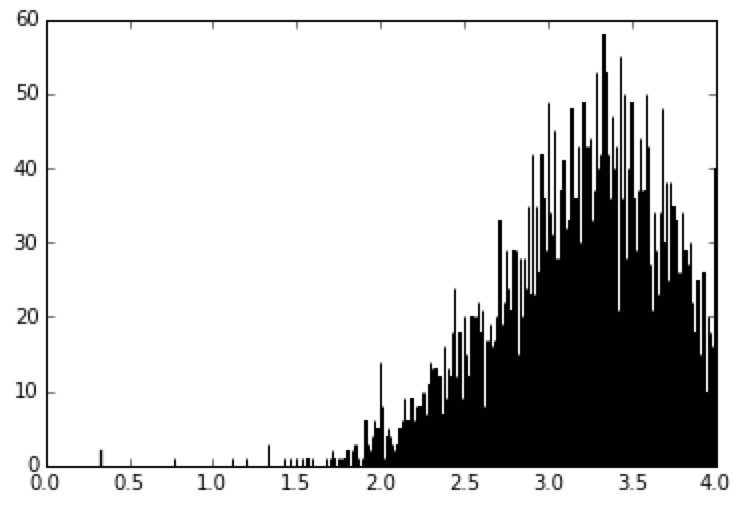

We will use this data (just the list of GPAs) for exploring the various ideas presented in lecture about sampling theory and confidence intervals.  

**You should use the scipy statistics functions (mean, var, std) shown in the code cell at the top of this document. Note carefully how population and sample standard deviations are calculated there.** 

(a) Calculate the mean and (population) standard deviation of this population and print them out to 4 decimal places. These are your benchmark values for the actual parameters of the population. 

(b) Write a function <code>getSample(n)</code> to generate ONE random sample of n samples from <code>gpaList</code>,  and return the sample mean and the sample standard deviation. Using the techniques developed in lecture, report on your estimation of the population mean using a confidence interval for 95% (NOT 95.14....%) confidence. Simply print out the confidence interval result for one random sample of size n = 30, in the same format dfas you did for Problem 6. (Do NOT use the data from (a) for this, remember, you are taking the sample because you supposedly can't get the whole population.) 

Hint: Use the <code>numpy.random</code> function <code>choice(L,n)</code>, which takes a list L and returns n random values, chosen equiprobably and with replacement (you can modify this behavior with parameters), docs are 
<a href="https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html">here</a>.

(c) Write a function <code>getInterval(CL,n)</code> which generates a random sample of size n and returns the bounds
for the confidence interval for the mean with confidence level (percentage) CL. (Hint: You can use the function <code>norm.interval(...)</code> to calculate the multiplier $k$ in the confidence interval -- see the lecture slides!)

If you use this function to generate a confidence interval, then it has successfully predicted the mean
if the actual population mean found in (a) is inside this interval. If everything works properly, 
then for a large number of trials, this function should succeed about CL % of the time!

Now run an experiment, with at least 10<sup>5</sup> trials/samples, and using CL = 95%, to determine what percentage of the trials successfully predicted the location of the actual mean. 

This may vary but you should usually get a probability close to 95%. Running more trials will improve the accuracy.....

(d) Now repeat c, but using a 90% confidence interval.  Again, your experiment should confirm this figure. 

In [10]:
a = list(studs['GPA'])
average = mean(a)
print("a)Mean GPA =", round4(average))
stanDev = std(a)
print("Standard deviation of GPA:", round4(stanDev))
print()


def getSample(n):
    sample = choice(a,n)
    sampleSTD = (stanDev / np.sqrt(n))
    return mean(sample), sampleSTD

answer = getSample(30)
k = norm.interval(alpha=0.95, loc=0, scale=1)
print("b)Mean GPA with 95% confidence:", round4(answer[0]), "+/-", round4(k[1]*answer[1]))
print()


numTrials = 10**5
def getInterval(CL, n):
    k = norm.interval(alpha=CL, loc=0, scale=1)
    mult = k[1]
    values = getSample(n)
    interval = [(values[0] - (mult*values[1])), (values[0] + (mult*values[1]))]
    return interval

count = 0
for i in range(numTrials):
    values = getInterval(0.95,30)
    if ((mean(a) > values[0]) and (mean(a) < values[1])):
        count += 1
answer = count / numTrials

print("c)successful prediction of mean with CL of 95%:", answer)
print()

count2 = 0
for i in range(numTrials):
    values = getInterval(0.90,30)
    if ((mean(a) > values[0]) and (mean(a) < values[1])):
        count2 += 1
        
answer = count2 / numTrials
print("d)successful prediction of mean with CL of 90%:", round4(answer))
print()

a)Mean GPA = 3.1729
Standard deviation of GPA: 0.4934

b)Mean GPA with 95% confidence: 3.069 +/- 0.1765

c)successful prediction of mean with CL of 95%: 0.94968

d)successful prediction of mean with CL of 90%: 0.8992



## Problem Eight

In this problem we will test "Bessel's Correction" for the sample variance (using n-1 rather then n in the denominator), using our GPA data from problem 7 above. This concept will be discussed on Monday 11/4  in lecture. 

Write a functions <code>getSampVar(n)</code>  which will generate a random sample of size n from the gpa data in Problem 7, and return the sample variance (which uses the value n-1 in the denominator) of the sample as calculated by the function <code>var(...)</code> given at the top of this notebook; then write a function <code>getPopVar(n)</code>
which does the same thing, but returns the population variance of the randomly-chosen sample. 

Then write a function <code>testPopVar(M,n)</code> which will generate M sample variances using <code>getPopVar(n)</code>, and return of the mean of these M values. Run this for M = 1000 and n = 2, 3, ..., 50 and store it in a list PV.

Do the same as the previous paragraph, but with a function <code>testSampVar(M,n)</code> which uses the sample variance and store it in a list SV.

Graph these results with the actual variance calculated directly from the entire data set (i.e., the x axis is the values 2, 3, ...., 50, and the three curves are the (constant) value of the true population variance (a list [v, v, ...., v] where v is the actual population variance calculated in problem 7 (a)), and the y values in PV and SV). 

The result of this problem is simply the graph comparing these two methods for estimating the variance for
samples of size 2 .. 50. 

Notice:  How do these two estimators compare as n approaches 50?

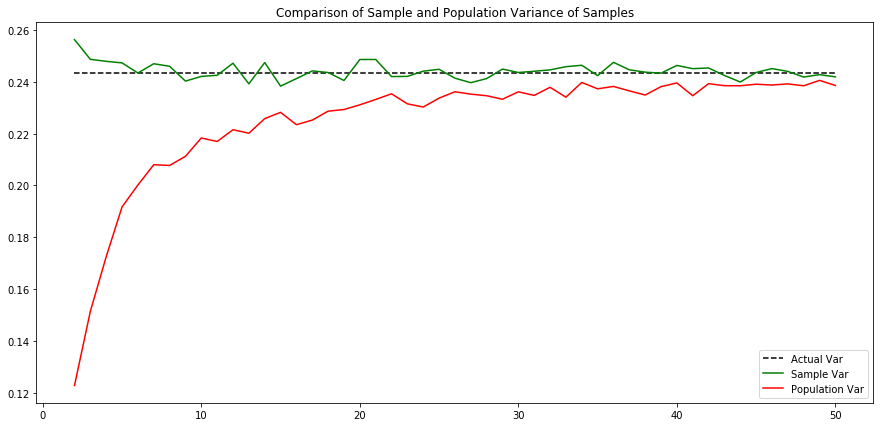

In [11]:
def getSampVar(n):
    return var(choice(a,n),ddof=1) # Your code here

def getPopVar(n):
    return var(choice(a,n)) # Your code here

seed(0)
actVar = var(a)
lo = 2
hi = 50

def testPopVar(M,n):
    total = 0
    for i in range(M):
        total += getPopVar(n)
    avgPopVar = total/M
    return avgPopVar # Your code here

M = 1000

PV = [testPopVar(M,i) for i in range(lo,hi+1)] # Your code here

def testSampVar(M,n):
    total = 0
    for i in range(M):
        total += getSampVar(n)
    avgSampVar = total/M
    return avgSampVar # Your code here

SV = [testSampVar(M,i) for i in range(lo,hi+1)]


plt.figure(figsize=(15,7))
plt.title("Comparison of Sample and Population Variance of Samples")
plt.plot([lo,hi],[actVar,actVar],color='k',linestyle='--',label="Actual Var")
plt.plot(range(lo,hi+1),SV,color='g',label="Sample Var")
plt.plot(range(lo,hi+1),PV,color='r',label="Population Var")
plt.legend()
plt.show()
